<a href="https://colab.research.google.com/github/ikwak2/StatBook/blob/main/ch9/9_7_R_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.7 R 연습

9.6 엑셀 연습과 마찬가지로 [표 10-1]에 주어진 자료를 이용하여 회귀분석을 실시한다.

## 자료 입력 

In [1]:
## 현재 폴더로 예제파일 ex9.csv 파일을 다운받습니다. 
system("wget https://raw.githubusercontent.com/ikwak2/StatBook/main/ch9/ex9.csv")

In [3]:
x<-read.csv("ex9.csv",header=T)
x

Day,Wind,GHI,Power
<int>,<dbl>,<dbl>,<dbl>
1,3.5,1.08,56.3
2,2.5,1.73,94.1
3,1.9,1.69,92.6
4,2.5,1.27,52.2
5,2.4,1.76,96.0
6,2.1,1.70,92.0
7,3.6,1.39,74.5
8,4.9,1.74,95.3
9,0.8,1.30,62.6


read.csv 명령어를 이용하여 ex9 파일을 x에 저장한다. 첫 번째 변수 Wind는 풍속, 두 번째 변수 GHI는 일사량, 세 번째 변수 Power은 태양광 발전량이다.

## 일사량과 태양광 발전량의 산포도 구하기

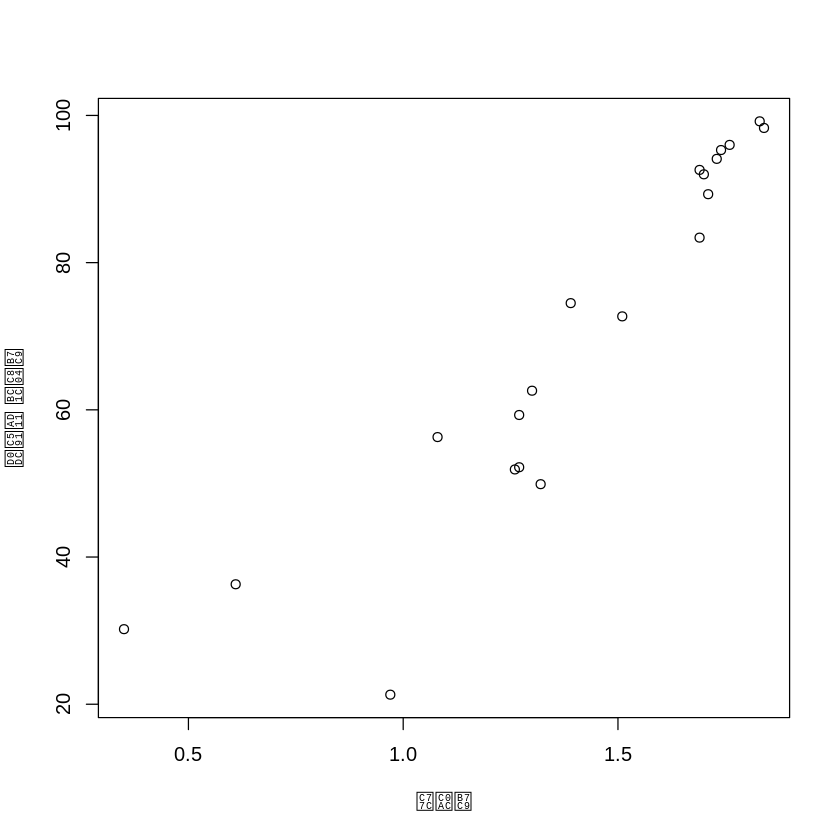

In [4]:
plot(x$GHI, x$Power, xlab = "일사량", ylab = "태양광 발전량")

## 풍속과 태양광 발전량, 일사량과 태양광 발전량의 상관계수
### 풍속과 태양광 발전량의 상관계수

In [5]:
cor(x$Wind, x$Power)

[1] 0.1451349

### 일사량과 태양광 발전량의 상관계수

In [6]:
cor(x$GHI, x$Power)

[1] 0.9179055

## 회귀분석

In [7]:
ex.9<-lm(Power ~ Wind + GHI, data = x)
summary(ex.9)


Call:
lm(formula = Power ~ Wind + GHI, data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.311  -2.646   1.642   6.066  13.838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -18.288      9.341  -1.958   0.0669 .  
Wind           3.979      1.969   2.021   0.0593 .  
GHI           55.798      5.224  10.681 5.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.315 on 17 degrees of freedom
Multiple R-squared:  0.8731,	Adjusted R-squared:  0.8581 
F-statistic: 58.46 on 2 and 17 DF,  p-value: 2.403e-08


R에서 기본으로 제공하는 명령어 lm를 이용하여 회귀분석을 실시한다. 명령문에서 괄호 안은 회귀식, 사용할 자료명 순이다. ‘~’ 기호 앞의 변수는 종속변수, 기호 뒤의 변수들은 독립변수이다. 두 개 이상의 종속변수가 필요한 경우 ‘+’ 기호를 사용하여 추가한다. 위의 식은 태양광 발전량(Power)에 대한 풍속(Wind)과 일사량(GHI)의 영향을 알기 위한 식이다. 사용하는 자료 x 안에 식에 사용되는 변수 Power, Wind, GHI가 포함되어 있어야 한다. summary 명령어를 이용하면 회귀분석의 정리된 결과를 볼 수 있다.  
위 결과에 의할 때 태양광 발전량에 대한 풍속, 일사량의 회귀식은  
$\hat{Y} = -18.288 + 3.979 X_1 + 55.798X_2$
와 같다.

In [9]:
anova(ex.9)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Wind,1,244.7413,244.74127,2.820781,1.113341e-01
GHI,1,9899.1387,9899.13875,114.093163,5.841573e-09
Residuals,17,1474.9820,86.76365,NA,NA


anova 함수에 저장된 회귀식을 입력하면 분산분석표를 확인할 수 있다.

In [10]:
ex.9$fitted.values
ex.9$residuals

1         2         3         4         5         6         7         8 
 55.90083  88.19035  83.57093  62.52327  89.46638  84.92474  73.59613  98.29837 
        9        10        11        12        13        14        15        16 
 57.43261  27.68618  69.54810  66.90484  85.56052  40.61094  63.95488  95.91981 
       17        18        19        20 
101.72851  84.68689  60.53368  16.36204

1           2           3           4           5           6 
  0.3991678   5.9096467   9.0290748 -10.3232725   6.5336247   7.0752588 
          7           8           9          10          11          12 
  0.9038693  -2.9983655   5.1673936   8.6138187   3.1518952 -17.0048446 
         13          14          15          16          17          18 
 -2.1605152 -19.3109378 -12.0548825   2.3801945  -2.5285136   4.6131148 
         19          20 
 -1.2336824  13.8379551

ex.9에 저장된 회귀분석 결과값 중 적합값과 잔차를 따로 살펴볼 수 있다.